In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
df_rentalcars = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
df_rentalcars.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


-계약유형과 마일리지 사용 컬럼 결합

In [28]:
# 계약 유형과 마일리지 결합하여 새로운 컬럼 생성
df_rentalcars['contract_mileage_combination'] = df_rentalcars['type_of_contract'].astype(str) + '_' + df_rentalcars['Mileage'].astype(str)

# 결과 확인
df_rentalcars[['type_of_contract', 'Mileage', 'contract_mileage_combination']].head()



,type_of_contract,Mileage,contract_mileage_combination
0,렌탈,1862.0,렌탈_1862.0
1,렌탈,2532.0,렌탈_2532.0
2,렌탈,2363.0,렌탈_2363.0
3,멤버십,2449.0,멤버십_2449.0
4,멤버십,1942.0,멤버십_1942.0


In [17]:
df_rentalcars['contract_mileage'] = df_rentalcars['type_of_contract'] + ' - ' + df_rentalcars['Mileage'].astype(str)

In [18]:
df_grouped_amount = df_rentalcars.groupby('contract_mileage')['amount'].mean().reset_index()

In [20]:
# NaN 값을 0으로 채우기 (히트맵을 위해)
df_mileage_usage_pivot = df_rentalcars['contract_mileage'].fillna(0)

/tmp/ipykernel_488/773824426.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mileage_usage_pivot = df_rentalcars.groupby(['type_of_contract', 'Mileage_range']).size().reset_index(name='count')


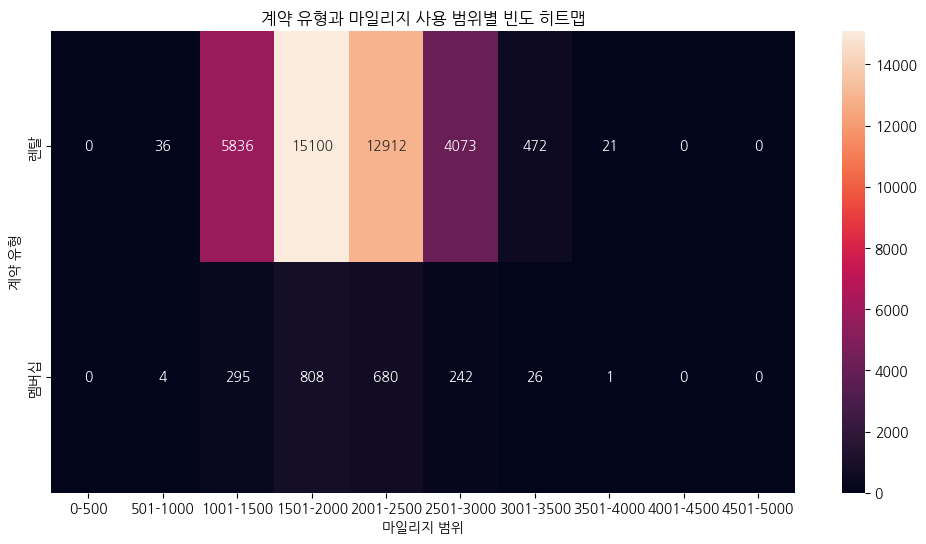

In [25]:
# 마일리지를 범위로 그룹화
df_rentalcars['Mileage_range'] = pd.cut(df_rentalcars['Mileage'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000'])

# 그룹화된 데이터를 기반으로 피벗 테이블 생성
df_mileage_usage_pivot = df_rentalcars.groupby(['type_of_contract', 'Mileage_range']).size().reset_index(name='count')
df_mileage_usage_pivot = df_mileage_usage_pivot.pivot(index='type_of_contract', columns='Mileage_range', values='count').fillna(0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(df_mileage_usage_pivot, annot=True, fmt='g')
plt.title('계약 유형과 마일리지 사용 범위별 빈도 히트맵')
plt.xlabel('마일리지 범위')
plt.ylabel('계약 유형')
plt.show()




    * 마일리지 사용 빈도와 고객 이탈 간의 관계
    -렌탈 고객이 마일리지를 더 자주 사용하고 있다는 것은, 이 그룹이 더 적극적으로 마일리지를 활용하고 있다는 의미입니다. 이런 고객들은 마일리지 사용을 통해 얻는 가치를 느끼기 때문에 지속적인 이용을 유도할 가능성이 큼

    -반면, 멤버십 고객의 마일리지 사용 빈도가 낮은 것은, 이들이 마일리지를 잘 활용하지 못하거나 마일리지를 사용하는데 대해 큰 인센티브를 느끼지 못한다는 것을 나타냅니다. 이들은 마일리지의 혜택을 잘 모르거나, 그 가치를 적극적으로 인식하지 못하는 경우가 많을 수 있음

* 마일리지 사용이 높은 고객이 많은 집단이 서비스를 자주 이용하고 있는 집단
    - 마일리지가 많거나 마일리지 사용을 자주한 고객에게 특별 프로모션 진행

* 마일리지 사용이 낮은 고객이 많은 집단은 서비스를 충분히 이용하지 않고있는 집단 - 멤버쉽 
    -마일리지 사용 촉진을 위한 프로모션 실시 하여 마일리지의 적극 활용 유도 및 소비 지속 유도
    
* 마일리지 사용이 높은 집단일수록 프리미엄 서비스 프로모션 진행

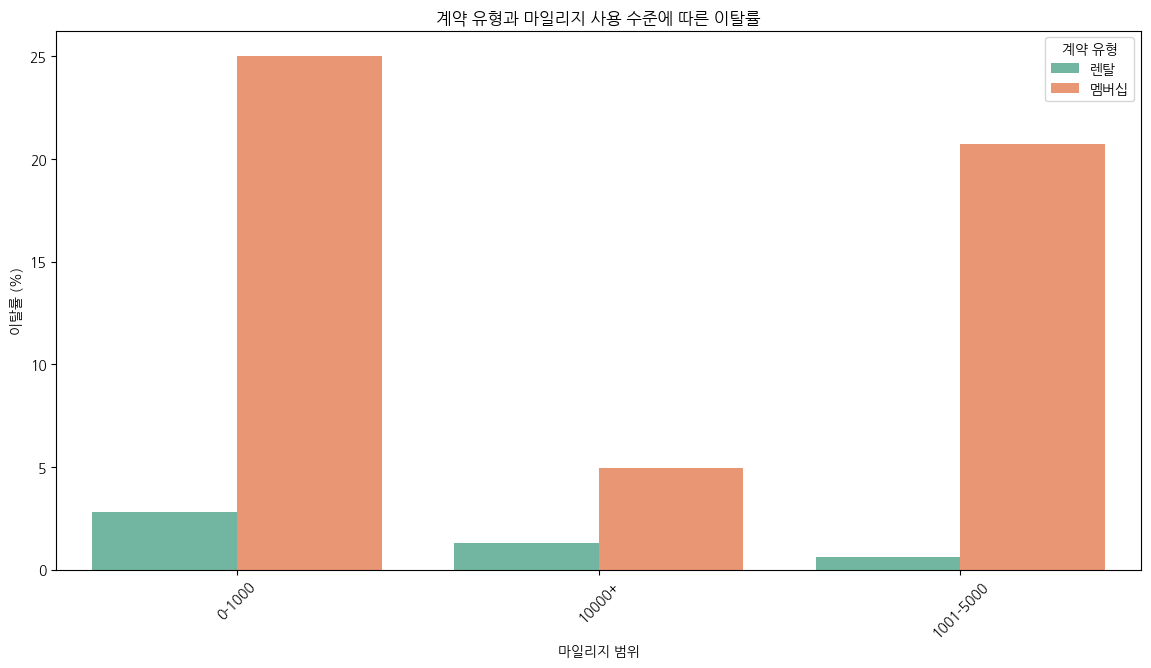

In [30]:
# 마일리지 범위 설정 (예: 0-1000, 1001-5000, 5001-10000)
def mileage_range(mileage):
    if mileage <= 1000:
        return '0-1000'
    elif mileage <= 5000:
        return '1001-5000'
    elif mileage <= 10000:
        return '5001-10000'
    else:
        return '10000+'

# 마일리지 범위 컬럼 추가
df_rentalcars['mileage_range'] = df_rentalcars['Mileage'].apply(mileage_range)

# 이탈 고객을 '해약확정' 또는 '이탈' 상태로 정의
df_rentalcars['churn'] = df_rentalcars['state'].apply(lambda x: 1 if x in ['해약확정', '이탈'] else 0)

# 계약 유형과 마일리지 범위별로 이탈률 계산
churn_rate_df = df_rentalcars.groupby(['type_of_contract', 'mileage_range'])['churn'].agg(['sum', 'count'])
churn_rate_df['churn_rate'] = churn_rate_df['sum'] / churn_rate_df['count'] * 100

# 이탈률 시각화 (바 차트)
plt.figure(figsize=(14, 7))
sns.barplot(x=churn_rate_df.index.get_level_values('mileage_range'), 
            y=churn_rate_df['churn_rate'], 
            hue=churn_rate_df.index.get_level_values('type_of_contract'), 
            palette='Set2')

plt.title('계약 유형과 마일리지 사용 수준에 따른 이탈률')
plt.xlabel('마일리지 범위')
plt.ylabel('이탈률 (%)')
plt.legend(title='계약 유형', loc='upper right')
plt.xticks(rotation=45)
plt.show()


    - 렌트 고객보다 멤버쉽 고객 이탈률이 더 높음 저단위의 마일리지 수를 가지고 있는 이용자 이탈율이 높음 
    - 고단위 마일리지 고객들은 이탈율이 적음
    - 저단위 마일리지 고객의 이탈을 막기위한 프로모션 필요(마일리지 활용혜택 확장, 장기계약 유도 등)

    *마일리지 범위에 따른 이탈률 분석
    -저단위 마일리지 고객의 이탈률이 높다는 점: 이 고객들은 마일리지를 적게 보유하고 있으며, 마일리지를 사용할 수 있는 기회가 적거나 그 사용에 대한 유인이 낮기 때문 이들은 마일리지를 충분히 활용하지 못하고 이탈할 가능성이 큼

    마일리지를  통해 받을 수 있는 혜택이 적습니다. 이는 그들이 마일리지를 더 이상 중요하게 생각하지 않게 만들며, 결국 서비스에 대한 충성도가 떨어지고 이탈을 초래
    -멤버십 고객의 높은 이탈률은 마일리지 사용 범위가 제한적인 경우가 많기 때문입니다. 마일리지 활용의 기회가 부족하거나 혜택이 부족하다고 느낀 고객은 다른 서비스로 이동할 확률이 높음

    **계약유형과 마일리지 상관관계를 이용하여 이탈율 분석 한 결과:    
    -멤버쉽 고객의 마일리지 이용빈도가 낮고 이탈율이 높은것을 확인 -멤버쉽 고객 소비력을 높이기 위해 집중하여 프로모션 진행
    

    -멤버십 고객에게 마일리지 사용 시 멤버십 등급을 상향 조정하는 방식 제공
    -멤버십 가입 고객에게 일정 마일리지를 보너스로 제공하여, 멤버십 혜택을 활용할 수 있도록 유도
